In [33]:
# Familiar imports
import numpy as np
import pandas as pd

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# For training model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

#for analysis
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


import warnings
warnings.simplefilter("ignore")

In [34]:
# Load the training data
train = pd.read_csv("30-days-of-ml/train.csv",index_col=0)
test = pd.read_csv("30-days-of-ml/test.csv", index_col=0)

# Preview the data
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
# Separate target from features
y = train['target']
features = train.drop(['target'], axis=1)

# Preview features
features.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [6]:
train.shape

(300000, 25)

In [7]:
train.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [9]:
train.target.describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

(array([5.90000e+01, 8.40000e+01, 1.49000e+02, 2.09000e+02, 3.11440e+04,
        5.55360e+04, 1.12029e+05, 6.84650e+04, 2.27780e+04, 9.47400e+03]),
 array([ 4.05410006,  4.68988923,  5.3256784 ,  5.96146757,  6.59725674,
         7.23304591,  7.86883508,  8.50462425,  9.14041341,  9.77620258,
        10.41199175]),
 <BarContainer object of 10 artists>)

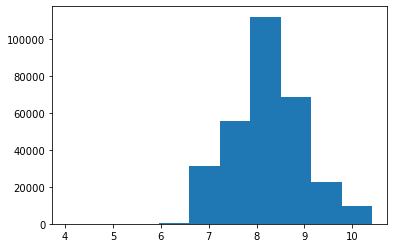

In [44]:
plt.hist(train.target)

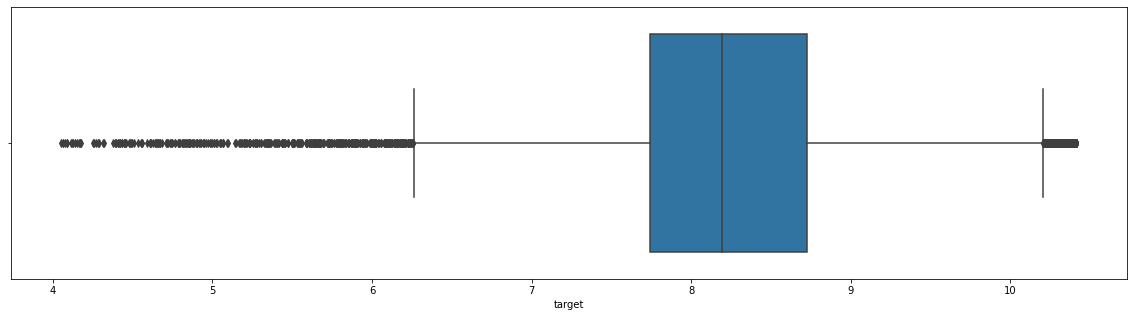

In [4]:
plt.figure(figsize = (20,5))
sns.boxplot(train.target)
plt.show()

In [3]:
train=train.loc[(train['target']>=4)]

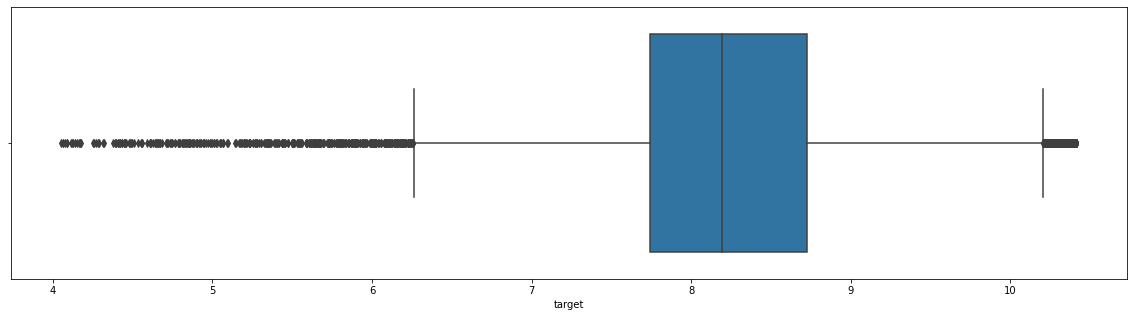

In [5]:
plt.figure(figsize = (20,5))
sns.boxplot(train.target)
plt.show()

In [6]:
train=train.loc[(train['target']>=6)]

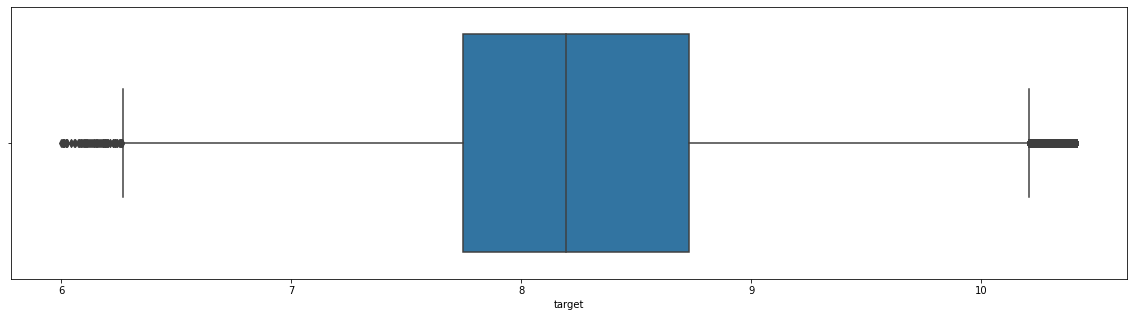

In [7]:
plt.figure(figsize = (20,5))
sns.boxplot(train.target)
plt.show()

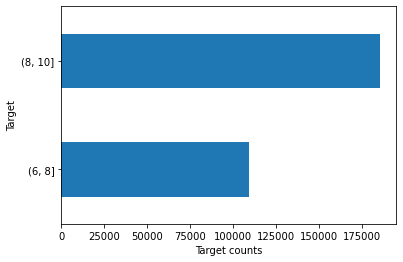

In [66]:
train.target.groupby(pd.cut(train.target, np.arange(6,11,2))).count().plot(kind='barh')
plt.xlabel('Target counts')
plt.ylabel('Target')
plt.show()

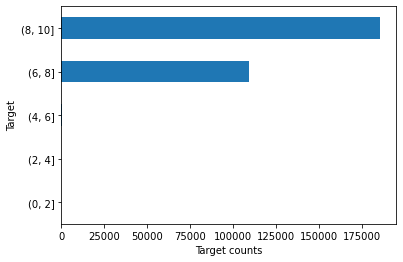

In [43]:
train.target.groupby(pd.cut(train.target, np.arange(0,11,2))).count().plot(kind='barh')
plt.xlabel('Target counts')
plt.ylabel('Target')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


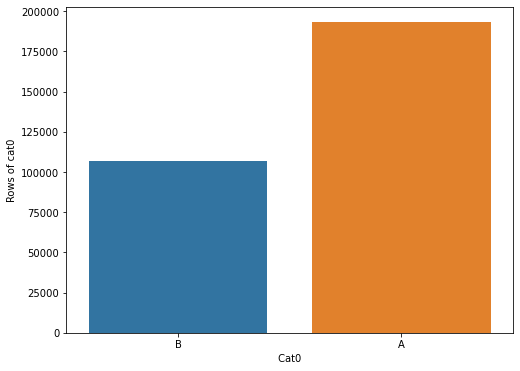

In [51]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat0)
plt.xlabel(' Cat0 ')
plt.ylabel('Rows of cat0')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


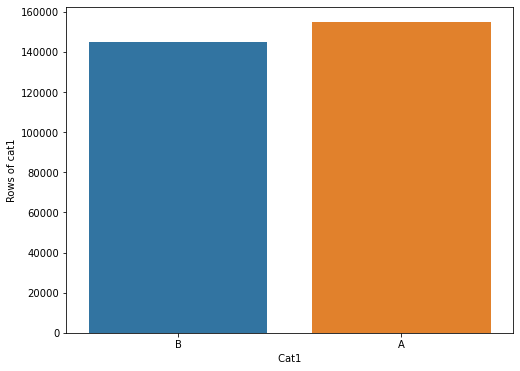

In [52]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat1)
plt.xlabel(' Cat1 ')
plt.ylabel('Rows of cat1')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


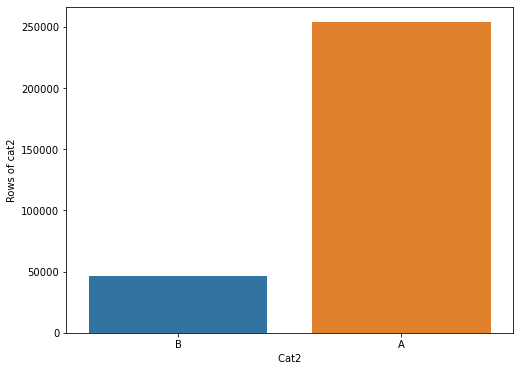

In [53]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat2)
plt.xlabel(' Cat2 ')
plt.ylabel('Rows of cat2')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


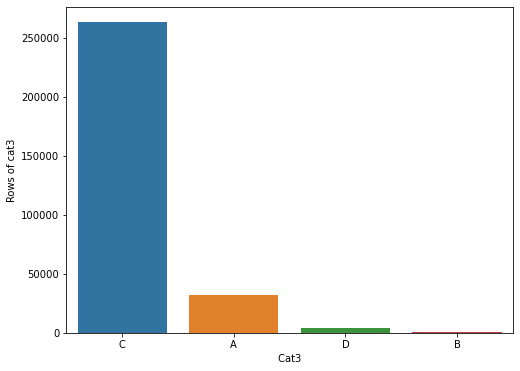

In [55]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat3)
plt.xlabel(' Cat3 ')
plt.ylabel('Rows of cat3')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


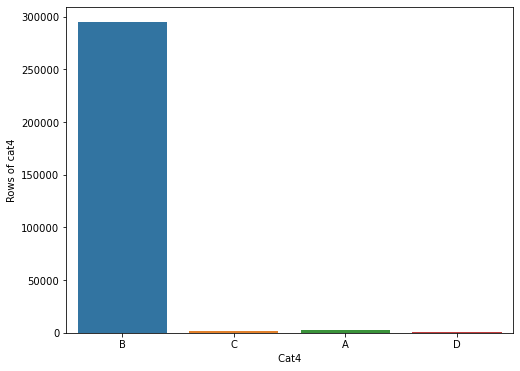

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat4)
plt.xlabel(' Cat4 ')
plt.ylabel('Rows of cat4')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


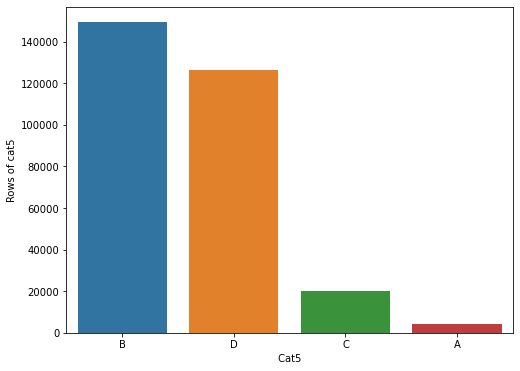

In [58]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat5)
plt.xlabel(' Cat5 ')
plt.ylabel('Rows of cat5')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


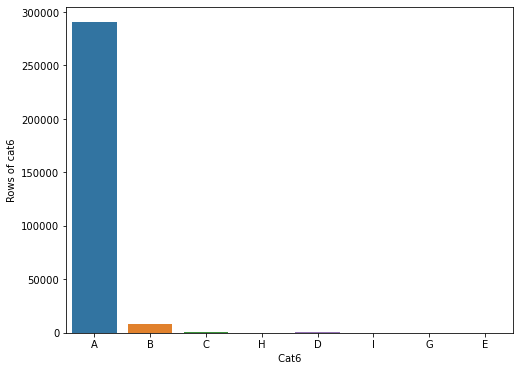

In [59]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat6)
plt.xlabel(' Cat6 ')
plt.ylabel('Rows of cat6')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


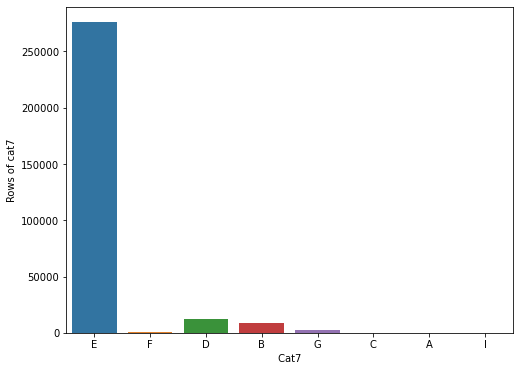

In [60]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat7)
plt.xlabel(' Cat7 ')
plt.ylabel('Rows of cat7')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


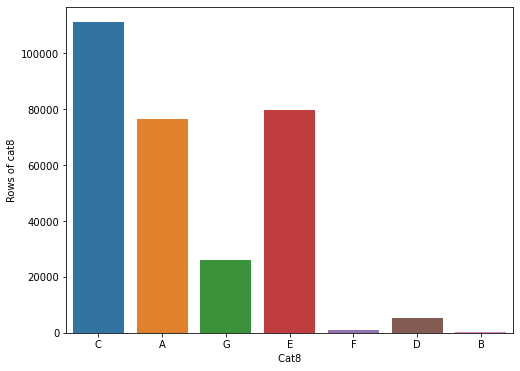

In [61]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat8)
plt.xlabel(' Cat8 ')
plt.ylabel('Rows of cat8')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


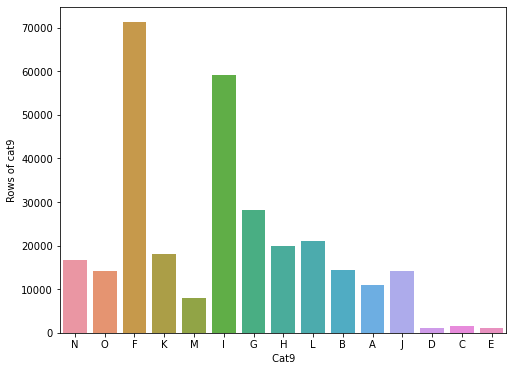

In [63]:
plt.figure(figsize = (8,6))
sns.countplot(train.cat9)
plt.xlabel(' Cat9 ')
plt.ylabel('Rows of cat9')
plt.show()

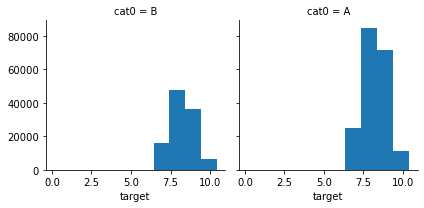

In [65]:
n = sns.FacetGrid(train, col='cat0')
n.map(plt.hist, 'target')
plt.show()

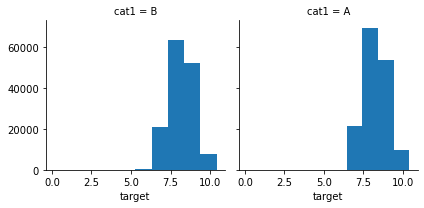

In [66]:
n = sns.FacetGrid(train, col='cat1')
n.map(plt.hist, 'target')
plt.show()

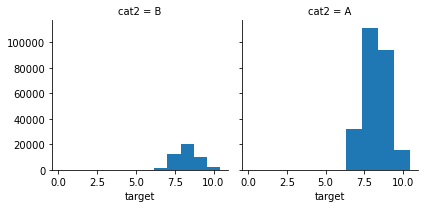

In [67]:
n = sns.FacetGrid(train, col='cat2')
n.map(plt.hist, 'target')
plt.show()

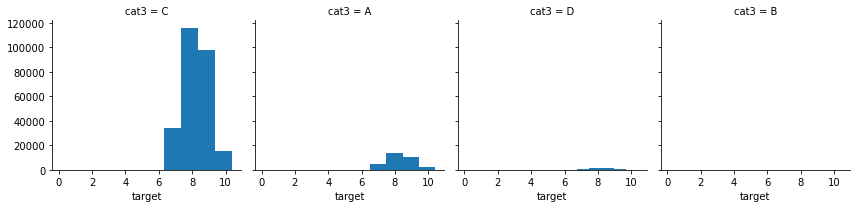

In [68]:
n = sns.FacetGrid(train, col='cat3')
n.map(plt.hist, 'target')
plt.show()

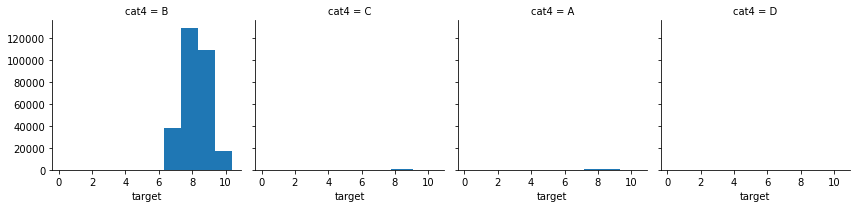

In [69]:
n = sns.FacetGrid(train, col='cat4')
n.map(plt.hist, 'target')
plt.show()

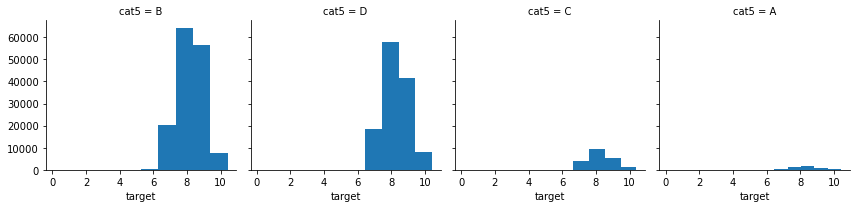

In [70]:
n = sns.FacetGrid(train, col='cat5')
n.map(plt.hist, 'target')
plt.show()

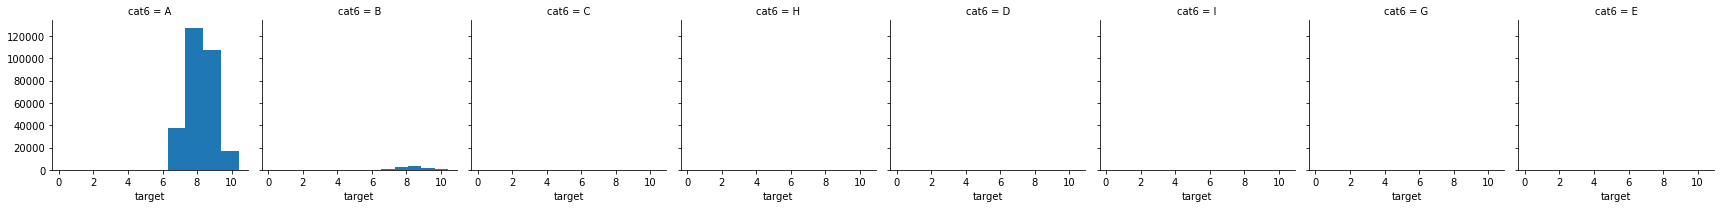

In [71]:
n = sns.FacetGrid(train, col='cat6')
n.map(plt.hist, 'target')
plt.show()

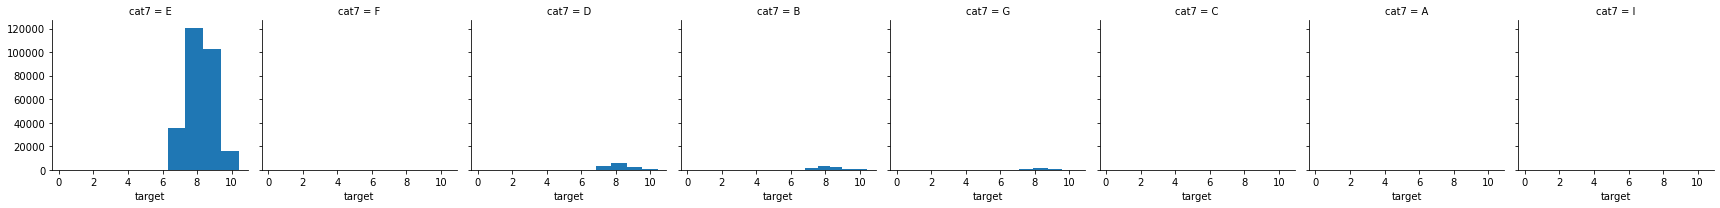

In [72]:
n = sns.FacetGrid(train, col='cat7')
n.map(plt.hist, 'target')
plt.show()

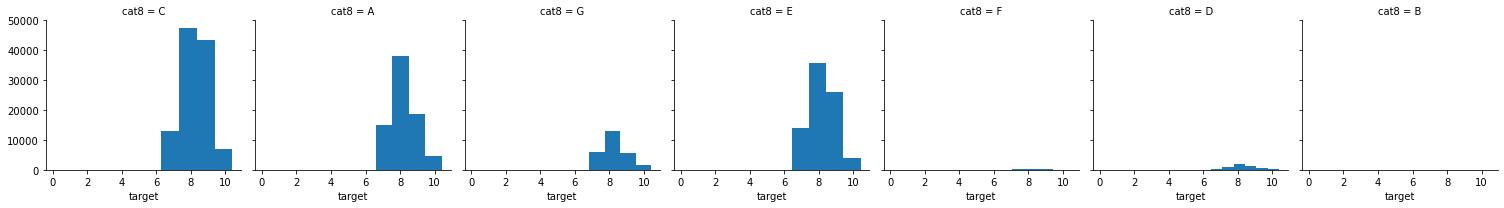

In [73]:
n = sns.FacetGrid(train, col='cat8')
n.map(plt.hist, 'target')
plt.show()

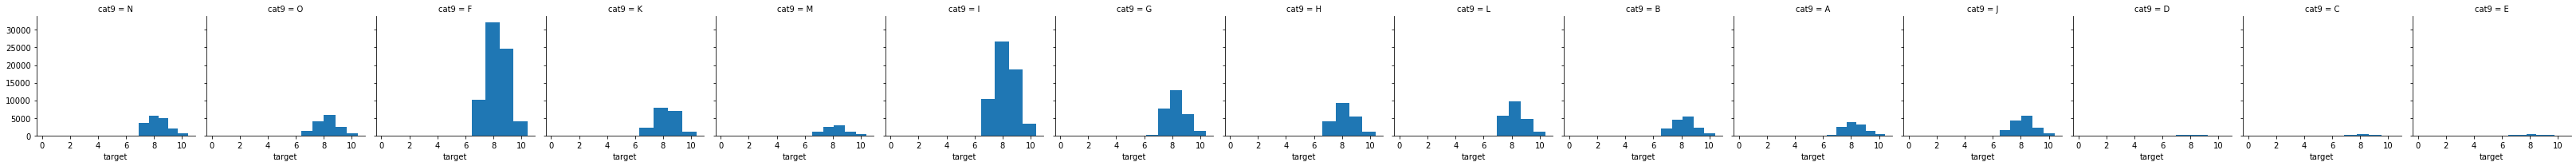

In [74]:
n = sns.FacetGrid(train, col='cat9')
n.map(plt.hist, 'target')
plt.show()

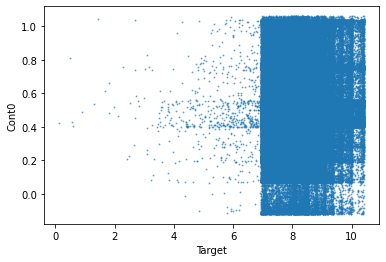

In [76]:
plt.scatter(train.target, train.cont0 , s=1, alpha=0.5)
plt.ylabel('Cont0')
plt.xlabel('Target')
plt.show()

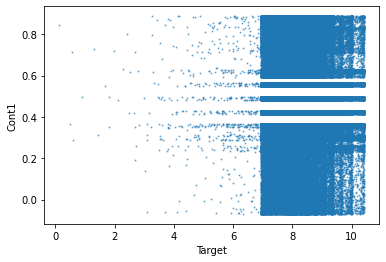

In [11]:
plt.scatter(train.target, train.cont1 , s=1, alpha=0.5)
plt.ylabel('Cont1')
plt.xlabel('Target')
plt.show()

In [14]:
list(zip( range(0,len(train.columns)),train.columns))

[(0, 'cat0'),
 (1, 'cat1'),
 (2, 'cat2'),
 (3, 'cat3'),
 (4, 'cat4'),
 (5, 'cat5'),
 (6, 'cat6'),
 (7, 'cat7'),
 (8, 'cat8'),
 (9, 'cat9'),
 (10, 'cont0'),
 (11, 'cont1'),
 (12, 'cont2'),
 (13, 'cont3'),
 (14, 'cont4'),
 (15, 'cont5'),
 (16, 'cont6'),
 (17, 'cont7'),
 (18, 'cont8'),
 (19, 'cont9'),
 (20, 'cont10'),
 (21, 'cont11'),
 (22, 'cont12'),
 (23, 'cont13'),
 (24, 'target')]

In [15]:
Y = train.iloc[:,24].values
Y

array([8.11363388, 8.48123279, 8.3643506 , ..., 8.70675465, 7.22956932,
       8.63114553])

In [16]:
#select possible features
X=train.iloc[:,[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].values
X

array([[ 0.20146955, -0.01482185,  0.66969879, ...,  0.32240097,
         0.86985011,  8.11363388],
       [ 0.74306801,  0.36741066,  1.02160538, ...,  0.26197529,
         0.46508287,  8.48123279],
       [ 0.74270829,  0.31038344, -0.01267284, ...,  0.54147351,
         0.76384583,  8.3643506 ],
       ...,
       [ 0.54427918,  0.06093709,  0.59095471, ...,  0.71413949,
         0.24573164,  8.70675465],
       [ 0.30006232,  0.61311817,  0.2852126 , ...,  0.38025354,
         0.33203036,  7.22956932],
       [ 0.85775185,  0.62852758,  0.53962466, ...,  0.63975437,
         0.6893169 ,  8.63114553]])

In [17]:
#multiple linear regression
#Y = a0 + a1x1 + a2x2 + ... + anxn
#for this, we need a constant for a0
#trat's why we add one row of 1 as it was our a0
print("Add {} rows de 1's for X0".format(X.shape[0]))

Add 300000 rows de 1's for X0


In [18]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X1

array([[ 1.        ,  0.20146955, -0.01482185, ...,  0.32240097,
         0.86985011,  8.11363388],
       [ 1.        ,  0.74306801,  0.36741066, ...,  0.26197529,
         0.46508287,  8.48123279],
       [ 1.        ,  0.74270829,  0.31038344, ...,  0.54147351,
         0.76384583,  8.3643506 ],
       ...,
       [ 1.        ,  0.54427918,  0.06093709, ...,  0.71413949,
         0.24573164,  8.70675465],
       [ 1.        ,  0.30006232,  0.61311817, ...,  0.38025354,
         0.33203036,  7.22956932],
       [ 1.        ,  0.85775185,  0.62852758, ...,  0.63975437,
         0.6893169 ,  8.63114553]])

In [19]:
X1.shape

(300000, 16)

In [20]:
#Seleccionar todas las features de X
X_opt = X1[:,range(0,16)]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

#Tomar los p_values de cada feature
p_Vals = regressor_OLS.pvalues
print(p_Vals)
#5% de significancia por ahora
sig_Level = 0.1

#Iteracion sobre cada feature para remover los valores que estan debajo de la significancia
while max(p_Vals) > sig_Level:
    print("Probabilidad de cada feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    #print("X_opt:{}".format(X_opt))
    print("\n")
    print("Feature en index {} no sirve \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " las features que quedan... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Resumen de optimizacion con cada una de las {} mejores features".format(str(X_opt.shape[1]-1)))
print(X_opt)
regressor_OLS.summary()

#se elimina dia

[3.65582421e-095 7.06116177e-133 1.56669841e-012 3.42060217e-025
 4.20260062e-024 1.09523329e-087 8.24580723e-065 1.81394853e-036
 3.53754274e-011 1.61170828e-096 8.38708899e-031 2.66507009e-001
 2.08020206e-010 9.33634739e-011 3.44642124e-010 0.00000000e+000]
Probabilidad de cada feature 

[3.65582421e-095 7.06116177e-133 1.56669841e-012 3.42060217e-025
 4.20260062e-024 1.09523329e-087 8.24580723e-065 1.81394853e-036
 3.53754274e-011 1.61170828e-096 8.38708899e-031 2.66507009e-001
 2.08020206e-010 9.33634739e-011 3.44642124e-010 0.00000000e+000]


Feature en index 11 no sirve 

14 las features que quedan... 


Resumen de optimizacion con cada una de las 14 mejores features
[[ 1.          0.20146955 -0.01482185 ...  0.32240097  0.86985011
   8.11363388]
 [ 1.          0.74306801  0.36741066 ...  0.26197529  0.46508287
   8.48123279]
 [ 1.          0.74270829  0.31038344 ...  0.54147351  0.76384583
   8.3643506 ]
 ...
 [ 1.          0.54427918  0.06093709 ...  0.71413949  0.24573164
   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.504e+32
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:41:20   Log-Likelihood:             9.3562e+06
No. Observations:              300000   AIC:                        -1.871e+07
Df Residuals:                  299985   BIC:                        -1.871e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.643e-15   1.65e-16    -22.140      0.000   -3.97e-15   -3.32e-15
x1          8.465e-16    6.5e-17     13.016      0.000    7.19e-16    9.74e-16
x2          3.851e-16    5.9e-17      6.531      0.000     2.7e-16    5.01e-16
x3         -4.961e-16   5.66e-17     -8.762      0.000   -6.07e-16   -3.85e-16
x4          6.748e-16   6.04e-17     11.164      0.000    5.56e-16    7.93e-16
x5          1.929e-15   5.35e-17     36.056      0.000    1.82e-15    2.03e-15
x6         -5.343e-16   6.82e-17     -7.835      0.000   -6.68e-16   -4.01e-16
x7          6.245e-16   6.21e-17     10.050      0.000    5.03e-16    7.46e-16
x8         -5.135e-16   6.56e-17     -7.826      0.000   -6.42e-16   -3.85e-16
x9          9.853e-16   6.36e-17     15.497      0.000    8.61e-16    1.11e-15
x10         6.106e-16   7.07e-17      8.643      0.000    4.72e-16    7.49e-16
x11         1.402e-15   6.45e-17     21.737      0.000    1.28e-15    1.53e-15
x12          -6.8e-16    6.6e-17    -10.299      0.000   -8.09e-16   -5.51e-16
x13         1.228e-15   5.68e-17     21.633      0.000    1.12e-15    1.34e-15
x14            1.0000    1.7e-17   5.88e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1696.014   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1784.518
Skew:                          -0.164   Prob(JB):                         0.00
Kurtosis:                       3.187   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]

# ordinal-encode categorical columns
X = features.copy()
X_test = test.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
X_test[object_cols] = ordinal_encoder.transform(test[object_cols])

# Preview the ordinal-encoded features
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


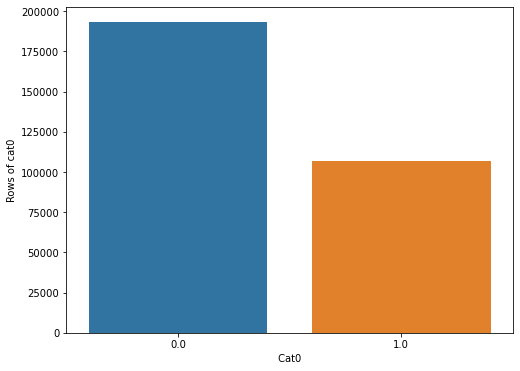

In [6]:
plt.figure(figsize = (8,6))
sns.countplot(X.cat0)
plt.xlabel(' Cat0 ')
plt.ylabel('Rows of cat0')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


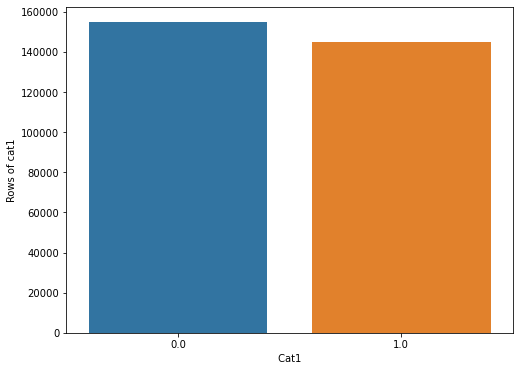

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(X.cat1)
plt.xlabel(' Cat1 ')
plt.ylabel('Rows of cat1')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


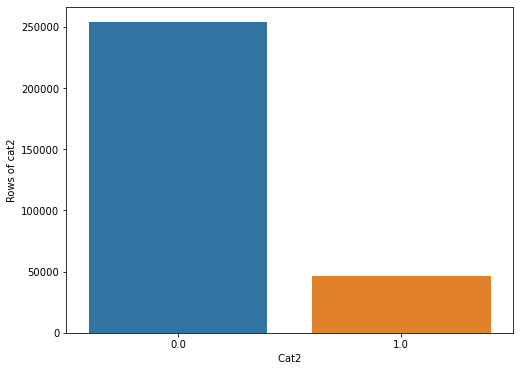

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(X.cat2)
plt.xlabel(' Cat2 ')
plt.ylabel('Rows of cat2')
plt.show()

In [5]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]

# ordinal-encode categorical columns
X = train.copy()
X_test = test.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
X_test[object_cols] = ordinal_encoder.transform(test[object_cols])

# Preview the ordinal-encoded features
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


id
1         8.113634
2         8.481233
3         8.364351
4         8.049253
6         7.972260
            ...   
499993    7.945605
499996    7.326118
499997    8.706755
499998    7.229569
499999    8.631146
Name: target, Length: 300000, dtype: float64

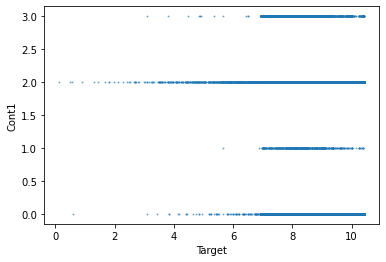

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


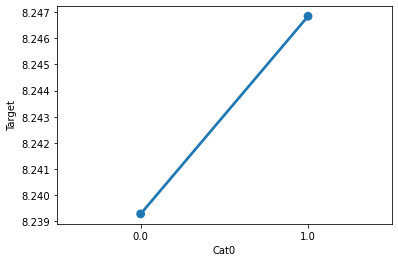

In [23]:
cat0_t = X.groupby('cat0').target.mean()
sns.pointplot(cat0_t.index, cat0_t.values)
plt.ylabel('Target')
plt.xlabel('Cat0')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


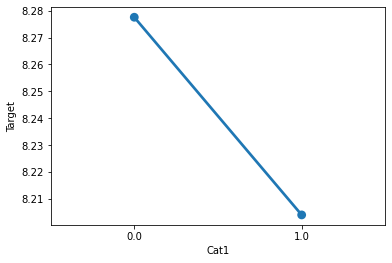

In [24]:
cat1_t = X.groupby('cat1').target.mean()
sns.pointplot(cat1_t.index, cat1_t.values)
plt.ylabel('Target')
plt.xlabel('Cat1')
plt.show()

C:\Users\celes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


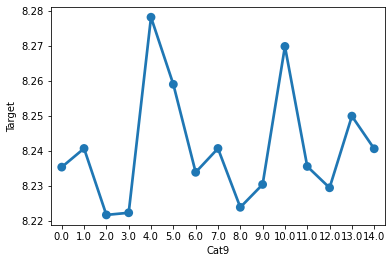

In [25]:
cat9_t = X.groupby('cat9').target.mean()
sns.pointplot(cat9_t.index, cat9_t.values)
plt.ylabel('Target')
plt.xlabel('Cat9')
plt.show()

In [6]:
list(zip( range(0,len(X.columns)),X.columns))

[(0, 'cat0'),
 (1, 'cat1'),
 (2, 'cat2'),
 (3, 'cat3'),
 (4, 'cat4'),
 (5, 'cat5'),
 (6, 'cat6'),
 (7, 'cat7'),
 (8, 'cat8'),
 (9, 'cat9'),
 (10, 'cont0'),
 (11, 'cont1'),
 (12, 'cont2'),
 (13, 'cont3'),
 (14, 'cont4'),
 (15, 'cont5'),
 (16, 'cont6'),
 (17, 'cont7'),
 (18, 'cont8'),
 (19, 'cont9'),
 (20, 'cont10'),
 (21, 'cont11'),
 (22, 'cont12'),
 (23, 'cont13'),
 (24, 'target')]

In [7]:
#select target
Y = X.iloc[:,24].values
Y

array([8.11363388, 8.48123279, 8.3643506 , ..., 8.70675465, 7.22956932,
       8.63114553])

In [8]:
#select possible features
X_features=X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
X_features

array([[1.        , 1.        , 1.        , ..., 0.3778727 , 0.32240097,
        0.86985011],
       [1.        , 1.        , 0.        , ..., 0.92170092, 0.26197529,
        0.46508287],
       [0.        , 0.        , 0.        , ..., 0.62012589, 0.54147351,
        0.76384583],
       ...,
       [1.        , 1.        , 0.        , ..., 0.6296062 , 0.71413949,
        0.24573164],
       [0.        , 1.        , 0.        , ..., 0.61116941, 0.38025354,
        0.33203036],
       [0.        , 0.        , 0.        , ..., 0.48439178, 0.63975437,
        0.6893169 ]])

In [9]:
#multiple linear regression
#Y = a0 + a1x1 + a2x2 + ... + anxn
#for this, we need a constant for a0
#trat's why we add one row of 1 as it was our a0
print("Add {} rows de 1's for X0".format(X_features.shape[0]))

Add 300000 rows de 1's for X0


In [10]:
X1 = np.append(arr = np.ones((X_features.shape[0],1)).astype(int), values = X_features, axis = 1)
X1

array([[1.        , 1.        , 1.        , ..., 0.3778727 , 0.32240097,
        0.86985011],
       [1.        , 1.        , 1.        , ..., 0.92170092, 0.26197529,
        0.46508287],
       [1.        , 0.        , 0.        , ..., 0.62012589, 0.54147351,
        0.76384583],
       ...,
       [1.        , 1.        , 1.        , ..., 0.6296062 , 0.71413949,
        0.24573164],
       [1.        , 0.        , 1.        , ..., 0.61116941, 0.38025354,
        0.33203036],
       [1.        , 0.        , 0.        , ..., 0.48439178, 0.63975437,
        0.6893169 ]])

In [11]:
print(X_features.shape)
print(X1.shape)

(300000, 24)
(300000, 25)


In [13]:
#Seleccionar todas las features de X
X_opt = X1[:,range(0,16)]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

#Tomar los p_values de cada feature
p_Vals = regressor_OLS.pvalues
print(p_Vals)
#5% de significancia por ahora
sig_Level = 0.001

#Iteracion sobre cada feature para remover los valores que estan debajo de la significancia
while max(p_Vals) > sig_Level:
    print("Probabilidad de cada feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    #print("X_opt:{}".format(X_opt))
    print("\n")
    print("Feature en index {} no sirve \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " las features que quedan... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Resumen de optimizacion con cada una de las {} mejores features".format(str(X_opt.shape[1]-1)))
print(X_opt)
regressor_OLS.summary()

[0.00000000e+000 1.97832946e-004 6.11486289e-145 1.57838518e-004
 2.13174166e-018 7.44430668e-001 3.21625460e-004 1.12491478e-003
 6.22095131e-001 2.08888783e-006 4.84017088e-001 9.42088746e-063
 2.50012936e-001 2.45824250e-150 1.89194058e-057 1.60033076e-030]
Probabilidad de cada feature 

[0.00000000e+000 1.97832946e-004 6.11486289e-145 1.57838518e-004
 2.13174166e-018 7.44430668e-001 3.21625460e-004 1.12491478e-003
 6.22095131e-001 2.08888783e-006 4.84017088e-001 9.42088746e-063
 2.50012936e-001 2.45824250e-150 1.89194058e-057 1.60033076e-030]


Feature en index 5 no sirve 

14 las features que quedan... 


Probabilidad de cada feature 

[0.00000000e+000 1.97601037e-004 5.88146022e-145 1.57795927e-004
 2.13921972e-018 3.18875616e-004 1.12701702e-003 6.21775252e-001
 2.09082181e-006 4.83874501e-001 9.37758754e-063 2.49764088e-001
 2.45388979e-150 1.87727968e-057 1.59625417e-030]


Feature en index 7 no sirve 

13 las features que quedan... 


Probabilidad de cada feature 

[0.0000000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     208.9
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:            -3.3695e+05
No. Observations:              300000   AIC:                         6.739e+05
Df Residuals:                  299989   BIC:                         6.740e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2546      0.009    946.184      0.000       8.238       8.272
x1             0.0106      0.003      3.722      0.000       0.005       0.016
x2            -0.0721      0.003    -25.677      0.000      -0.078      -0.067
x3            -0.0147      0.004     -3.804      0.000      -0.022      -0.007
x4            -0.0188      0.002     -8.763      0.000      -0.023      -0.015
x5             0.0062      0.002      3.704      0.000       0.003       0.009
x6            -0.0036      0.001     -4.754      0.000      -0.005      -0.002
x7             0.1122      0.007     16.799      0.000       0.099       0.125
x8             0.1552      0.006     26.135      0.000       0.144       0.167
x9            -0.1033      0.006    -15.971      0.000      -0.116      -0.091
x10           -0.0661      0.006    -11.486      0.000      -0.077      -0.055
==============================================================================
Omnibus:                     5165.241   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7976.589
Skew:                           0.183   Prob(JB):                         0.00
Kurtosis:                       3.710   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Starting

In [13]:
# Separate target from features
y = train['target']
features = train.drop(['target'], axis=1)

# Preview features
features.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [14]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]

# ordinal-encode categorical columns
X = features.copy()
X_test = test.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
X_test[object_cols] = ordinal_encoder.transform(test[object_cols])

# Preview the ordinal-encoded features
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299628 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    299628 non-null  object 
 1   cat1    299628 non-null  object 
 2   cat2    299628 non-null  object 
 3   cat3    299628 non-null  object 
 4   cat4    299628 non-null  object 
 5   cat5    299628 non-null  object 
 6   cat6    299628 non-null  object 
 7   cat7    299628 non-null  object 
 8   cat8    299628 non-null  object 
 9   cat9    299628 non-null  object 
 10  cont0   299628 non-null  float64
 11  cont1   299628 non-null  float64
 12  cont2   299628 non-null  float64
 13  cont3   299628 non-null  float64
 14  cont4   299628 non-null  float64
 15  cont5   299628 non-null  float64
 16  cont6   299628 non-null  float64
 17  cont7   299628 non-null  float64
 18  cont8   299628 non-null  float64
 19  cont9   299628 non-null  float64
 20  cont10  299628 non-null  float64
 21  cont11  29

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299628 entries, 1 to 499999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    299628 non-null  float64
 1   cat1    299628 non-null  float64
 2   cat2    299628 non-null  float64
 3   cat3    299628 non-null  float64
 4   cat4    299628 non-null  float64
 5   cat5    299628 non-null  float64
 6   cat6    299628 non-null  float64
 7   cat7    299628 non-null  float64
 8   cat8    299628 non-null  float64
 9   cat9    299628 non-null  float64
 10  cont0   299628 non-null  float64
 11  cont1   299628 non-null  float64
 12  cont2   299628 non-null  float64
 13  cont3   299628 non-null  float64
 14  cont4   299628 non-null  float64
 15  cont5   299628 non-null  float64
 16  cont6   299628 non-null  float64
 17  cont7   299628 non-null  float64
 18  cont8   299628 non-null  float64
 19  cont9   299628 non-null  float64
 20  cont10  299628 non-null  float64
 21  cont11  29

Separate the data in test and train

# With all features

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [15]:
# Define the model 
model = RandomForestRegressor(random_state=1)

# Train the model (will take about 10 minutes to run)
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print(mean_squared_error(y_valid, preds_valid, squared=False))
print('R2_score: {}'.format(r2_score(y_valid,preds_valid)))


0.7238970488852675
R2_score: 0.03030100513902334


In [9]:
print('R2_score: {}'.format(r2_score(y_valid,preds_valid)))

R2_score: 0.029003704712724065


# Without 11 feature

In [13]:
X_features=X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]].values

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y, random_state=0)

In [15]:
#without 11 feature
# Define the model 
model = RandomForestRegressor(random_state=1)

# Train the model (will take about 10 minutes to run)
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print(mean_squared_error(y_valid, preds_valid))
print('R2_score: {}'.format(r2_score(y_valid,preds_valid)))

0.5441106405369592
R2_score: 0.028742117047910964


# XGB All features tunned

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [17]:
# Define the model
xgb_model = XGBRegressor(n_estimators=5000, learning_rate=0.01,random_state=0 ) # Your code here

# Fit the model
xgb_model.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_valid,y_valid)], verbose=False) 

# Get predictions
predictions = xgb_model.predict(X_valid) 

print(mean_squared_error(y_valid, predictions, squared=False))
print('R2_score: {}'.format(r2_score(y_valid,predictions)))

0.7114228207377264
R2_score: 0.0634328571592585


# XGB without 11 feature tunned 

In [27]:
X_features=X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]].values

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y, random_state=0)

In [56]:
# Define the model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01,random_state=0) # Your code here

# Fit the model
xgb_model.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_valid,y_valid)], verbose=False) 

# Get predictions
predictions = xgb_model.predict(X_valid) 

print(mean_squared_error(y_valid, predictions))
print('R2_score: {}'.format(r2_score(y_valid,predictions)))

KeyboardInterrupt: 

# XGB tunned

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [19]:
xgb_params = {'n_estimators': 10000,
              'learning_rate': 0.25,
              'subsample': 0.926,
              'colsample_bytree': 0.84,
              'max_depth': 2,
              'booster': 'gbtree', 
              'reg_lambda': 45.1,
              'reg_alpha': 34.9,
              'random_state': 42,
              'n_jobs': 4}

xgb_2 = XGBRegressor(n_estimators=20000, random_state=0, learning_rate=.02, max_depth=5, tree_method='hist')
xgb_2.fit(X_train,y_train,early_stopping_rounds=20,
               eval_set=[(X_valid,y_valid)],verbose=False)

predictions =xgb_2.predict(X_valid)
print(mean_squared_error(y_valid, predictions, squared=False))
print('R2_score: {}'.format(r2_score(y_valid,predictions)))


0.7102846287669783
R2_score: 0.0664272521653696


# Light GBM with all features standar scaler

In [17]:
# With all features
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [19]:
lgbm_parameters = {
   'metric': 'mae', 
    'n_estimators': 50000,
    'reg_alpha': 10.924491968127692,
    'reg_lambda': 17.396730654687218,
    'colsample_bytree': 0.21497646795452627,
    'subsample': 0.7582562557431147,
    'learning_rate': 0.009985133666265425,
    'max_depth': 18,
    'num_leaves': 63,
    'min_child_samples': 27,
    'max_bin': 523,
    'cat_l2': 0.025083670064082797
}



lgbm_model = LGBMRegressor(**lgbm_parameters)
#lgbm_model.fit(X_train, y_train, eval_set = ((X_valid,y_valid)), early_stopping_rounds = 400,categorical_feature=object_cols)
lgbm_model.fit(X_train, y_train, eval_set = ((X_valid,y_valid)), early_stopping_rounds = 400)

[1]	valid_0's l1: 0.586902
Training until validation scores don't improve for 400 rounds
[2]	valid_0's l1: 0.586801
[3]	valid_0's l1: 0.586779
[4]	valid_0's l1: 0.586759
[5]	valid_0's l1: 0.586734
[6]	valid_0's l1: 0.586655
[7]	valid_0's l1: 0.586579
[8]	valid_0's l1: 0.586552
[9]	valid_0's l1: 0.586475
[10]	valid_0's l1: 0.586435
[11]	valid_0's l1: 0.586364
[12]	valid_0's l1: 0.586256
[13]	valid_0's l1: 0.586206
[14]	valid_0's l1: 0.586164
[15]	valid_0's l1: 0.58609
[16]	valid_0's l1: 0.586058
[17]	valid_0's l1: 0.585983
[18]	valid_0's l1: 0.585954
[19]	valid_0's l1: 0.585901
[20]	valid_0's l1: 0.585875
[21]	valid_0's l1: 0.585862
[22]	valid_0's l1: 0.585786
[23]	valid_0's l1: 0.585768
[24]	valid_0's l1: 0.58574
[25]	valid_0's l1: 0.585725
[26]	valid_0's l1: 0.585651
[27]	valid_0's l1: 0.585608
[28]	valid_0's l1: 0.585569
[29]	valid_0's l1: 0.585493
[30]	valid_0's l1: 0.585482
[31]	valid_0's l1: 0.585412
[32]	valid_0's l1: 0.585337
[33]	valid_0's l1: 0.585292
[34]	valid_0's l1: 0.5852

[287]	valid_0's l1: 0.577195
[288]	valid_0's l1: 0.577185
[289]	valid_0's l1: 0.577156
[290]	valid_0's l1: 0.577127
[291]	valid_0's l1: 0.577118
[292]	valid_0's l1: 0.577106
[293]	valid_0's l1: 0.577072
[294]	valid_0's l1: 0.577052
[295]	valid_0's l1: 0.57702
[296]	valid_0's l1: 0.577009
[297]	valid_0's l1: 0.576998
[298]	valid_0's l1: 0.576988
[299]	valid_0's l1: 0.576951
[300]	valid_0's l1: 0.576924
[301]	valid_0's l1: 0.576901
[302]	valid_0's l1: 0.576889
[303]	valid_0's l1: 0.576875
[304]	valid_0's l1: 0.576845
[305]	valid_0's l1: 0.57683
[306]	valid_0's l1: 0.576796
[307]	valid_0's l1: 0.576783
[308]	valid_0's l1: 0.576773
[309]	valid_0's l1: 0.576753
[310]	valid_0's l1: 0.576731
[311]	valid_0's l1: 0.576697
[312]	valid_0's l1: 0.576676
[313]	valid_0's l1: 0.576636
[314]	valid_0's l1: 0.576605
[315]	valid_0's l1: 0.576578
[316]	valid_0's l1: 0.576561
[317]	valid_0's l1: 0.576529
[318]	valid_0's l1: 0.57649
[319]	valid_0's l1: 0.576458
[320]	valid_0's l1: 0.576444
[321]	valid_0's l

[576]	valid_0's l1: 0.572291
[577]	valid_0's l1: 0.572281
[578]	valid_0's l1: 0.572274
[579]	valid_0's l1: 0.572258
[580]	valid_0's l1: 0.572239
[581]	valid_0's l1: 0.572231
[582]	valid_0's l1: 0.572218
[583]	valid_0's l1: 0.572202
[584]	valid_0's l1: 0.572185
[585]	valid_0's l1: 0.572174
[586]	valid_0's l1: 0.57217
[587]	valid_0's l1: 0.572161
[588]	valid_0's l1: 0.572155
[589]	valid_0's l1: 0.572147
[590]	valid_0's l1: 0.572143
[591]	valid_0's l1: 0.572138
[592]	valid_0's l1: 0.572117
[593]	valid_0's l1: 0.572106
[594]	valid_0's l1: 0.572096
[595]	valid_0's l1: 0.572092
[596]	valid_0's l1: 0.572079
[597]	valid_0's l1: 0.572072
[598]	valid_0's l1: 0.572056
[599]	valid_0's l1: 0.57205
[600]	valid_0's l1: 0.572033
[601]	valid_0's l1: 0.572022
[602]	valid_0's l1: 0.572011
[603]	valid_0's l1: 0.571997
[604]	valid_0's l1: 0.571989
[605]	valid_0's l1: 0.571979
[606]	valid_0's l1: 0.571973
[607]	valid_0's l1: 0.571964
[608]	valid_0's l1: 0.571958
[609]	valid_0's l1: 0.571943
[610]	valid_0's 

[861]	valid_0's l1: 0.569834
[862]	valid_0's l1: 0.569831
[863]	valid_0's l1: 0.569821
[864]	valid_0's l1: 0.569811
[865]	valid_0's l1: 0.569805
[866]	valid_0's l1: 0.569802
[867]	valid_0's l1: 0.569794
[868]	valid_0's l1: 0.569787
[869]	valid_0's l1: 0.569784
[870]	valid_0's l1: 0.569777
[871]	valid_0's l1: 0.569772
[872]	valid_0's l1: 0.569763
[873]	valid_0's l1: 0.569755
[874]	valid_0's l1: 0.569746
[875]	valid_0's l1: 0.569739
[876]	valid_0's l1: 0.569735
[877]	valid_0's l1: 0.569728
[878]	valid_0's l1: 0.569724
[879]	valid_0's l1: 0.569722
[880]	valid_0's l1: 0.569712
[881]	valid_0's l1: 0.569705
[882]	valid_0's l1: 0.5697
[883]	valid_0's l1: 0.569696
[884]	valid_0's l1: 0.569687
[885]	valid_0's l1: 0.569684
[886]	valid_0's l1: 0.569675
[887]	valid_0's l1: 0.569671
[888]	valid_0's l1: 0.569661
[889]	valid_0's l1: 0.569654
[890]	valid_0's l1: 0.56965
[891]	valid_0's l1: 0.569644
[892]	valid_0's l1: 0.569642
[893]	valid_0's l1: 0.569636
[894]	valid_0's l1: 0.56963
[895]	valid_0's l1

[1143]	valid_0's l1: 0.568514
[1144]	valid_0's l1: 0.568513
[1145]	valid_0's l1: 0.56851
[1146]	valid_0's l1: 0.568507
[1147]	valid_0's l1: 0.568503
[1148]	valid_0's l1: 0.5685
[1149]	valid_0's l1: 0.568495
[1150]	valid_0's l1: 0.568493
[1151]	valid_0's l1: 0.56849
[1152]	valid_0's l1: 0.568483
[1153]	valid_0's l1: 0.56848
[1154]	valid_0's l1: 0.568477
[1155]	valid_0's l1: 0.568476
[1156]	valid_0's l1: 0.568475
[1157]	valid_0's l1: 0.568474
[1158]	valid_0's l1: 0.568473
[1159]	valid_0's l1: 0.56847
[1160]	valid_0's l1: 0.568467
[1161]	valid_0's l1: 0.56846
[1162]	valid_0's l1: 0.568459
[1163]	valid_0's l1: 0.568456
[1164]	valid_0's l1: 0.568453
[1165]	valid_0's l1: 0.56845
[1166]	valid_0's l1: 0.568446
[1167]	valid_0's l1: 0.568445
[1168]	valid_0's l1: 0.568441
[1169]	valid_0's l1: 0.568438
[1170]	valid_0's l1: 0.568436
[1171]	valid_0's l1: 0.568433
[1172]	valid_0's l1: 0.568426
[1173]	valid_0's l1: 0.568421
[1174]	valid_0's l1: 0.568418
[1175]	valid_0's l1: 0.568417
[1176]	valid_0's l

[1697]	valid_0's l1: 0.567302
[1698]	valid_0's l1: 0.567301
[1699]	valid_0's l1: 0.5673
[1700]	valid_0's l1: 0.567299
[1701]	valid_0's l1: 0.567296
[1702]	valid_0's l1: 0.567294
[1703]	valid_0's l1: 0.567291
[1704]	valid_0's l1: 0.56729
[1705]	valid_0's l1: 0.56729
[1706]	valid_0's l1: 0.56729
[1707]	valid_0's l1: 0.56729
[1708]	valid_0's l1: 0.567286
[1709]	valid_0's l1: 0.567284
[1710]	valid_0's l1: 0.567282
[1711]	valid_0's l1: 0.567281
[1712]	valid_0's l1: 0.56728
[1713]	valid_0's l1: 0.567279
[1714]	valid_0's l1: 0.567275
[1715]	valid_0's l1: 0.567275
[1716]	valid_0's l1: 0.567274
[1717]	valid_0's l1: 0.56727
[1718]	valid_0's l1: 0.56727
[1719]	valid_0's l1: 0.567268
[1720]	valid_0's l1: 0.567266
[1721]	valid_0's l1: 0.567265
[1722]	valid_0's l1: 0.567263
[1723]	valid_0's l1: 0.567259
[1724]	valid_0's l1: 0.567258
[1725]	valid_0's l1: 0.567257
[1726]	valid_0's l1: 0.567256
[1727]	valid_0's l1: 0.567255
[1728]	valid_0's l1: 0.567255
[1729]	valid_0's l1: 0.567254
[1730]	valid_0's l1

[1972]	valid_0's l1: 0.566996
[1973]	valid_0's l1: 0.566997
[1974]	valid_0's l1: 0.566997
[1975]	valid_0's l1: 0.566997
[1976]	valid_0's l1: 0.566997
[1977]	valid_0's l1: 0.566997
[1978]	valid_0's l1: 0.566993
[1979]	valid_0's l1: 0.566994
[1980]	valid_0's l1: 0.566992
[1981]	valid_0's l1: 0.566992
[1982]	valid_0's l1: 0.56699
[1983]	valid_0's l1: 0.56699
[1984]	valid_0's l1: 0.566989
[1985]	valid_0's l1: 0.566987
[1986]	valid_0's l1: 0.566986
[1987]	valid_0's l1: 0.566985
[1988]	valid_0's l1: 0.566985
[1989]	valid_0's l1: 0.566984
[1990]	valid_0's l1: 0.566983
[1991]	valid_0's l1: 0.566982
[1992]	valid_0's l1: 0.56698
[1993]	valid_0's l1: 0.566978
[1994]	valid_0's l1: 0.566976
[1995]	valid_0's l1: 0.566974
[1996]	valid_0's l1: 0.566972
[1997]	valid_0's l1: 0.566971
[1998]	valid_0's l1: 0.566971
[1999]	valid_0's l1: 0.566969
[2000]	valid_0's l1: 0.566968
[2001]	valid_0's l1: 0.566967
[2002]	valid_0's l1: 0.566967
[2003]	valid_0's l1: 0.566965
[2004]	valid_0's l1: 0.566964
[2005]	valid_

[2248]	valid_0's l1: 0.566801
[2249]	valid_0's l1: 0.566801
[2250]	valid_0's l1: 0.566798
[2251]	valid_0's l1: 0.566798
[2252]	valid_0's l1: 0.566797
[2253]	valid_0's l1: 0.566796
[2254]	valid_0's l1: 0.566796
[2255]	valid_0's l1: 0.566795
[2256]	valid_0's l1: 0.566794
[2257]	valid_0's l1: 0.566794
[2258]	valid_0's l1: 0.566794
[2259]	valid_0's l1: 0.566792
[2260]	valid_0's l1: 0.566791
[2261]	valid_0's l1: 0.56679
[2262]	valid_0's l1: 0.566789
[2263]	valid_0's l1: 0.566789
[2264]	valid_0's l1: 0.566789
[2265]	valid_0's l1: 0.566789
[2266]	valid_0's l1: 0.566788
[2267]	valid_0's l1: 0.566788
[2268]	valid_0's l1: 0.566789
[2269]	valid_0's l1: 0.566789
[2270]	valid_0's l1: 0.56679
[2271]	valid_0's l1: 0.566787
[2272]	valid_0's l1: 0.566787
[2273]	valid_0's l1: 0.566787
[2274]	valid_0's l1: 0.566787
[2275]	valid_0's l1: 0.566787
[2276]	valid_0's l1: 0.566787
[2277]	valid_0's l1: 0.566787
[2278]	valid_0's l1: 0.566786
[2279]	valid_0's l1: 0.566785
[2280]	valid_0's l1: 0.566784
[2281]	valid

[2527]	valid_0's l1: 0.56671
[2528]	valid_0's l1: 0.566709
[2529]	valid_0's l1: 0.566708
[2530]	valid_0's l1: 0.566709
[2531]	valid_0's l1: 0.566709
[2532]	valid_0's l1: 0.566709
[2533]	valid_0's l1: 0.566708
[2534]	valid_0's l1: 0.566709
[2535]	valid_0's l1: 0.56671
[2536]	valid_0's l1: 0.56671
[2537]	valid_0's l1: 0.566709
[2538]	valid_0's l1: 0.566709
[2539]	valid_0's l1: 0.566709
[2540]	valid_0's l1: 0.566709
[2541]	valid_0's l1: 0.566708
[2542]	valid_0's l1: 0.566707
[2543]	valid_0's l1: 0.566706
[2544]	valid_0's l1: 0.566706
[2545]	valid_0's l1: 0.566706
[2546]	valid_0's l1: 0.566705
[2547]	valid_0's l1: 0.566705
[2548]	valid_0's l1: 0.566706
[2549]	valid_0's l1: 0.566706
[2550]	valid_0's l1: 0.566705
[2551]	valid_0's l1: 0.566705
[2552]	valid_0's l1: 0.566703
[2553]	valid_0's l1: 0.566703
[2554]	valid_0's l1: 0.566704
[2555]	valid_0's l1: 0.566704
[2556]	valid_0's l1: 0.566706
[2557]	valid_0's l1: 0.566706
[2558]	valid_0's l1: 0.566706
[2559]	valid_0's l1: 0.566705
[2560]	valid_

[2804]	valid_0's l1: 0.566634
[2805]	valid_0's l1: 0.566634
[2806]	valid_0's l1: 0.566633
[2807]	valid_0's l1: 0.566633
[2808]	valid_0's l1: 0.566634
[2809]	valid_0's l1: 0.566634
[2810]	valid_0's l1: 0.566633
[2811]	valid_0's l1: 0.566634
[2812]	valid_0's l1: 0.566634
[2813]	valid_0's l1: 0.566633
[2814]	valid_0's l1: 0.566632
[2815]	valid_0's l1: 0.566631
[2816]	valid_0's l1: 0.566631
[2817]	valid_0's l1: 0.566631
[2818]	valid_0's l1: 0.566631
[2819]	valid_0's l1: 0.566631
[2820]	valid_0's l1: 0.566632
[2821]	valid_0's l1: 0.566632
[2822]	valid_0's l1: 0.566632
[2823]	valid_0's l1: 0.566632
[2824]	valid_0's l1: 0.566633
[2825]	valid_0's l1: 0.566633
[2826]	valid_0's l1: 0.566633
[2827]	valid_0's l1: 0.566634
[2828]	valid_0's l1: 0.566633
[2829]	valid_0's l1: 0.566633
[2830]	valid_0's l1: 0.566632
[2831]	valid_0's l1: 0.566632
[2832]	valid_0's l1: 0.566631
[2833]	valid_0's l1: 0.56663
[2834]	valid_0's l1: 0.56663
[2835]	valid_0's l1: 0.56663
[2836]	valid_0's l1: 0.566631
[2837]	valid_

[3086]	valid_0's l1: 0.566573
[3087]	valid_0's l1: 0.566573
[3088]	valid_0's l1: 0.566573
[3089]	valid_0's l1: 0.566574
[3090]	valid_0's l1: 0.566574
[3091]	valid_0's l1: 0.566574
[3092]	valid_0's l1: 0.566575
[3093]	valid_0's l1: 0.566575
[3094]	valid_0's l1: 0.566574
[3095]	valid_0's l1: 0.566573
[3096]	valid_0's l1: 0.566572
[3097]	valid_0's l1: 0.566571
[3098]	valid_0's l1: 0.566571
[3099]	valid_0's l1: 0.56657
[3100]	valid_0's l1: 0.56657
[3101]	valid_0's l1: 0.566572
[3102]	valid_0's l1: 0.566571
[3103]	valid_0's l1: 0.56657
[3104]	valid_0's l1: 0.56657
[3105]	valid_0's l1: 0.566569
[3106]	valid_0's l1: 0.56657
[3107]	valid_0's l1: 0.566569
[3108]	valid_0's l1: 0.566569
[3109]	valid_0's l1: 0.566568
[3110]	valid_0's l1: 0.566568
[3111]	valid_0's l1: 0.566569
[3112]	valid_0's l1: 0.566571
[3113]	valid_0's l1: 0.56657
[3114]	valid_0's l1: 0.566572
[3115]	valid_0's l1: 0.566573
[3116]	valid_0's l1: 0.566574
[3117]	valid_0's l1: 0.566576
[3118]	valid_0's l1: 0.566577
[3119]	valid_0's

[3365]	valid_0's l1: 0.566576
[3366]	valid_0's l1: 0.566575
[3367]	valid_0's l1: 0.566575
[3368]	valid_0's l1: 0.566575
[3369]	valid_0's l1: 0.566575
[3370]	valid_0's l1: 0.566574
[3371]	valid_0's l1: 0.566574
[3372]	valid_0's l1: 0.566573
[3373]	valid_0's l1: 0.566574
[3374]	valid_0's l1: 0.566573
[3375]	valid_0's l1: 0.566574
[3376]	valid_0's l1: 0.566573
[3377]	valid_0's l1: 0.566571
[3378]	valid_0's l1: 0.56657
[3379]	valid_0's l1: 0.56657
[3380]	valid_0's l1: 0.56657
[3381]	valid_0's l1: 0.56657
[3382]	valid_0's l1: 0.566571
[3383]	valid_0's l1: 0.56657
[3384]	valid_0's l1: 0.56657
[3385]	valid_0's l1: 0.56657
[3386]	valid_0's l1: 0.56657
[3387]	valid_0's l1: 0.56657
[3388]	valid_0's l1: 0.56657
[3389]	valid_0's l1: 0.56657
[3390]	valid_0's l1: 0.56657
[3391]	valid_0's l1: 0.566569
[3392]	valid_0's l1: 0.566568
[3393]	valid_0's l1: 0.566568
[3394]	valid_0's l1: 0.566568
[3395]	valid_0's l1: 0.566568
[3396]	valid_0's l1: 0.566568
[3397]	valid_0's l1: 0.566569
[3398]	valid_0's l1: 0

[3644]	valid_0's l1: 0.566565
[3645]	valid_0's l1: 0.566566
[3646]	valid_0's l1: 0.566566
[3647]	valid_0's l1: 0.566566
[3648]	valid_0's l1: 0.566567
[3649]	valid_0's l1: 0.566567
[3650]	valid_0's l1: 0.566566
[3651]	valid_0's l1: 0.566566
[3652]	valid_0's l1: 0.566567
[3653]	valid_0's l1: 0.566568
[3654]	valid_0's l1: 0.566568
[3655]	valid_0's l1: 0.566568
[3656]	valid_0's l1: 0.566569
[3657]	valid_0's l1: 0.56657
[3658]	valid_0's l1: 0.566569
[3659]	valid_0's l1: 0.566569
[3660]	valid_0's l1: 0.566568
[3661]	valid_0's l1: 0.566567
[3662]	valid_0's l1: 0.566566
[3663]	valid_0's l1: 0.566567
[3664]	valid_0's l1: 0.566566
[3665]	valid_0's l1: 0.566566
[3666]	valid_0's l1: 0.566566
[3667]	valid_0's l1: 0.566567
[3668]	valid_0's l1: 0.566566
[3669]	valid_0's l1: 0.566567
[3670]	valid_0's l1: 0.566568
[3671]	valid_0's l1: 0.566568
[3672]	valid_0's l1: 0.566567
[3673]	valid_0's l1: 0.566567
[3674]	valid_0's l1: 0.566568
[3675]	valid_0's l1: 0.566567
[3676]	valid_0's l1: 0.566566
[3677]	vali

LGBMRegressor(cat_l2=0.025083670064082797, colsample_bytree=0.21497646795452627,
              learning_rate=0.009985133666265425, max_bin=523, max_depth=18,
              metric='mae', min_child_samples=27, n_estimators=50000,
              num_leaves=63, reg_alpha=10.924491968127692,
              reg_lambda=17.396730654687218, subsample=0.7582562557431147)

In [20]:
# Get predictions
predictions = lgbm_model.predict(X_valid) 

print(mean_squared_error(y_valid, predictions, squared=False))
print('R2_score: {}'.format(r2_score(y_valid,predictions)))

0.7068397525969846
R2_score: 0.07546093665925302


### Using lgb with kfolds

In [35]:
# Separate target from features
features = train.drop(['target'], axis=1)

# Preview features
features.head()

object_cols = [col for col in features.columns if 'cat' in col]


X =features
X_test = test
y = train['target']

In [36]:

kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [37]:
for fold, (train_indices, valid_indices) in enumerate(kf.split(X=train)):
    print(fold, train_indices, valid_indices)
    

0 [     0      2      3 ... 299997 299998 299999] [     1      4      6 ... 299977 299978 299984]
1 [     0      1      2 ... 299997 299998 299999] [     3     18     22 ... 299990 299991 299992]
2 [     0      1      2 ... 299997 299998 299999] [     9     10     12 ... 299981 299982 299993]
3 [     0      1      2 ... 299995 299996 299998] [    23     25     33 ... 299994 299997 299999]
4 [     1      3      4 ... 299994 299997 299999] [     0      2      5 ... 299995 299996 299998]


In [38]:
lgbm_parameters = {
   'metric': 'rmse',
    'learning_rate':.008,
    'n_estimators': 50000,
    'reg_alpha': 9.56,
    'reg_lambda': 9.35,
    'colsample_bytree': 0.21497646795452627,
    'subsample': 0.7582562557431147,
    'learning_rate': 0.009985133666265425,
    'max_depth': 77,
    'num_leaves': 77,
    'min_child_samples': 290,
    'max_bin': 772,
    'cat_l2': 17,
    'cat_smoth':96,
    'seed': 2
}


In [39]:
predictions_lgbm = pd.DataFrame()
scores=[]

In [40]:
X[object_cols] = X[object_cols].astype("category")
X_test[object_cols] = X_test[object_cols].astype("category")

In [41]:
for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    #get the indixes from train_id valid_id and used them to separate those indexes in X_train and X_valid
    X_train, X_val = X.iloc[train_id, :], X.iloc[valid_id, :]
    y_train, y_val = y.iloc[train_id], y.iloc[valid_id]
    
    #with the values from X_val and X_train create a dataset
    lgbm_train = lgb.Dataset(X_train, y_train)
    lgbm_val = lgb.Dataset(X_val, y_val)
    
    lgbm_model =lgb.train(params=lgbm_parameters,
                         train_set=lgbm_train,
                         valid_sets=lgbm_val,
                         num_boost_round=100000,
                          early_stopping_rounds=200,
                          verbose_eval=1000,
                         categorical_feature=object_cols)
    pred_lgbm=lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
    score = lgbm_model.best_score
    scores.append(score)
    pred_lgbm=pd.DataFrame(pred_lgbm)
    predictions_lgbm = pd.concat([predictions_lgbm, pred_lgbm], axis=1)
    
    
    
    

[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10868
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 24
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Info] Start training from score 8.242618
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	valid_0's rmse: 0.71917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[1000]	valid_0's rmse: 0.717228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2000]	valid_0's rmse: 0.714087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3000]	valid_0's rmse: 0.713509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[3376]	valid_0's rmse: 0.713436


In [81]:

scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.7050382674712699)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.7106386344472869)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.707333316273436)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.7108965880582219)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.7066121486027324)])})]

In [42]:
predictions_1 = predictions_lgbm.mean(axis=1)


In [43]:
X = pd.concat([X, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y, predictions_1], axis=0).reset_index(drop=True)

In [44]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (500000, 24)
y.shape:  (500000,)


In [45]:
predictions_lgbm = pd.DataFrame()
scores=[]

In [46]:
X[object_cols] = X[object_cols].astype("category")
X_test[object_cols] = X_test[object_cols].astype("category")

In [47]:
for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    #get the indixes from train_id valid_id and used them to separate those indexes in X_train and X_valid
    X_train, X_val = X.iloc[train_id, :], X.iloc[valid_id, :]
    y_train, y_val = y.iloc[train_id], y.iloc[valid_id]
    
    #with the values from X_val and X_train create a dataset
    lgbm_train = lgb.Dataset(X_train, y_train)
    lgbm_val = lgb.Dataset(X_val, y_val)
    
    lgbm_model =lgb.train(params=lgbm_parameters,
                         train_set=lgbm_train,
                         valid_sets=lgbm_val,
                         num_boost_round=100000,
                          early_stopping_rounds=200,
                          verbose_eval=1000,
                         categorical_feature=object_cols)
    pred_lgbm=lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
    score = lgbm_model.best_score
    scores.append(score)
    pred_lgbm=pd.DataFrame(pred_lgbm)
    predictions_lgbm = pd.concat([predictions_lgbm, pred_lgbm], axis=1)

[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10868
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 24
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Info] Start training from score 8.241096
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	valid_0's rmse: 0.560174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

Early stopping, best iteration is:
[5096]	valid_0's rmse: 0.559765
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10868
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 24
[LightGBM] [Warning] Unknown parameter: cat_smoth
[LightGBM] [Info] Start training from score 8.242006
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	valid_0's rmse: 0.559573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [48]:
scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.554307639209474)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.553833025885928)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.5597653813766015)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.5536408361354992)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('rmse', 0.5514956920497527)])})]

In [49]:
predictions = predictions_lgbm.mean(axis=1)

In [50]:
predictions

0         8.045115
1         8.353240
2         8.389017
3         8.454656
4         8.143343
            ...   
199995    8.056936
199996    8.450263
199997    8.473239
199998    8.124222
199999    7.965720
Length: 200000, dtype: float64

In [51]:
submission = pd.read_csv("30-days-of-ml/sample_submission.csv")

In [52]:
submission.head()

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5


In [53]:
submission.target = predictions

In [54]:
submission.head()

,id,target
0,0,8.045115
1,5,8.353240
2,15,8.389017
3,16,8.454656
4,17,8.143343


In [56]:
submission.to_csv("submission_lgb.csv", index=False)